# Computer Vision

For computer vision related tasks, we will use the [OpenCV library](https://opencv.org/).
You can install OpenCV by running `pip install opencv-python`. This will install the base library. To install additional portions of it and get access to SIFT and other methods, you'll need to also run `pip install opencv-contrib-python`. You can run both in one command, `pip install opencv-python opencv-contrib-python`.

For this exercise, most of the code is provided from examples in the OpenCV documentation.

In [8]:
! pip install opencv-python==3.4.2.16
! pip install opencv-contrib-python==3.4.2.16

In [9]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import urllib

To read a local image you can use `cv2.imread(path)`. To read an image from a URL we will use the below function. One thing to note about OpenCV is that the RGB format it uses is BGR which may be different from what other tools expect to interface with in terms of ordering.

In [12]:
# Code from https://www.pyimagesearch.com/2015/03/02/convert-url-to-image-with-python-and-opencv/
import urllib.request
def url_to_image(url):
    """
      Download the image, convert it to a NumPy array, and then read
      it into OpenCV's format
    """    
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
    # return the image
    return image

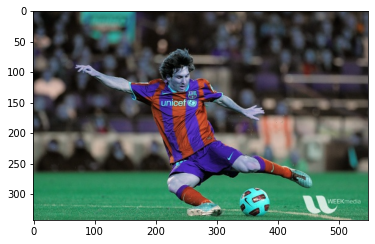

In [13]:
url = "https://github.com/opencv/opencv/blob/master/samples/data/messi5.jpg?raw=true"
img = url_to_image(url)

plt.imshow(img)
plt.show()

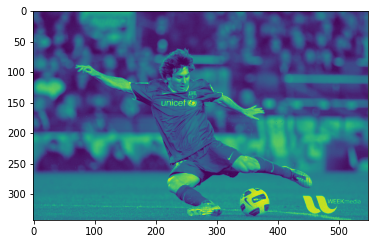

In [14]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#gray = np.float32(gray)
plt.imshow(gray)
plt.show()

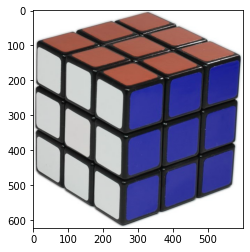

In [15]:
# Try out this image the first time you run through the exercise then do it again with an image of your choosing.
#url = 'https://github.com/opencv/opencv/blob/master/samples/data/blox.jpg?raw=true'
url = 'https://qph.fs.quoracdn.net/main-qimg-03e4eff680fb326985c1b2aa741d977c-c'
img = url_to_image(url)

plt.imshow(img)
plt.show()

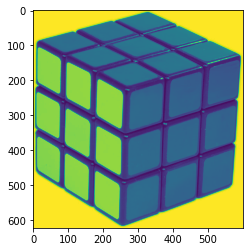

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
plt.imshow(gray)
plt.show()

Check out [the guide](https://docs.opencv.org/3.4.3/dc/d0d/tutorial_py_features_harris.html) on using Harris for corner detection as well as the function's [documentation](https://docs.opencv.org/3.4.3/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345).

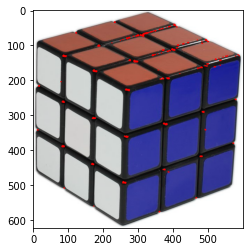

In [26]:
# Determine the harris scores and save to harris
# YOUR CODE HERE
#raise NotImplementedError()
harris = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
harris = cv2.dilate( harris,None)

# Threshold for an optimal value, it may vary depending on the image.
harrisImg = np.copy(img)
# Set values past a threshold to a red dot, try changing this value
threshold = 0.005*harris.max()
harrisImg[harris>threshold]=[255,0,0]

plt.imshow(harrisImg)
plt.show()

In [28]:
assert harris.shape == gray.shape

Check out [the guide](https://docs.opencv.org/3.4.3/d4/d8c/tutorial_py_shi_tomasi.html) on Shi-Tomasi corner detection and the function's [documentation](https://docs.opencv.org/3.4.3/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541).

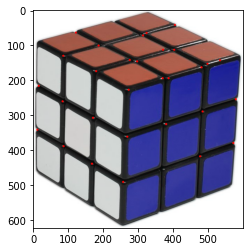

In [32]:
# Calculate the Shi-Tomasi corners with a maximum number of 30 corners and set them to corners
# YOUR CODE HERE
#raise NotImplementedError()

corners = cv2.goodFeaturesToTrack(gray,30,0.01,10)
corners = np.int0(corners)
stImg = np.copy(img)
for i in corners:
    x,y = i.ravel()
    cv2.circle(stImg,(x,y),3,255,-1)
plt.imshow(stImg)
plt.show()

In [34]:
assert corners.shape == (30, 1, 2)

With SIFT, SURF, FAST, BRIEF, ORB, and other keypoint detection methods, OpenCV implements the following API:

```python
m = method_create(params)
keyPoints = m.detect(image)
newImage = cv2.draw_keypoints(image, keyPoints, color=(red, green, blue)) 
```

- [detect docs](https://docs.opencv.org/3.4.3/d0/d13/classcv_1_1Feature2D.html#aa4e9a7082ec61ebc108806704fbd7887)
- [draw_keypoints docs](https://docs.opencv.org/3.4.3/d4/d5d/group__features2d__draw.html#gab958f8900dd10f14316521c149a60433)

This creates a method with specific parameters and uses that to detect key points in an image. The keypoints are then drawn on top of the image and returned in a new image that can be displayed.

SIFT and SURF are patented and may not work on colab. The respective guides are linked below with code to work with both of them in the next cells. You can install OpenCV locally with the appropriate flags to build those functions and see the results. For the exercise, this is just to familiarize you with the API when using SIFT and SURF which is similar to using FAST, BRIEF, and ORB later on.

- [SIFT guide](https://docs.opencv.org/3.4.3/da/df5/tutorial_py_sift_intro.html)
- [SURF guide](https://docs.opencv.org/3.4.3/df/dd2/tutorial_py_surf_intro.html)

In [35]:
try:
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(gray,None)
    siftImg=cv2.drawKeypoints(gray, kp, img)
    plt.imshow(siftImg)
except Exception as e:
    print(e)

OpenCV(3.4.2) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1121: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'



In [36]:
try:
    surf = cv2.xfeatures2d.SURF_create(400)
    kp=surf.detect(gray, None)
    surfImg = cv2.drawKeypoints(img,kp,None,(255,0,0),4) # Will draw red dots at the keypoints
    plt.imshow(surfImg)
    
except Exception as e:
      print(e)

OpenCV(3.4.2) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:892: error: (-215:Assertion failed) !_img.empty() && ((imgtype) & ((1 << 3) - 1)) == 0 && (imgcn == 1 || imgcn == 3 || imgcn == 4) in function 'detectAndCompute'



Check out [the guide](https://docs.opencv.org/3.4.3/df/d0c/tutorial_py_fast.html) on FAST.

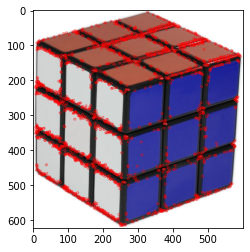

In [40]:
# Create a FAST feature detector and save it to fast
# Determine the keypoints using the detector and save them to fastKp
# Create a new image with red dots drawn over the key points, save it to fastImg

# YOUR CODE HERE
#raise NotImplementedError()
fast = cv2.FastFeatureDetector_create()
fastKp = fast.detect(img,None)
fastImg = cv2.drawKeypoints(img, fastKp, None, color=(255,0,0))

plt.imshow(fastImg)
plt.show()

In [41]:
assert fast
assert len(fastKp) > 10
assert fastImg.shape == img.shape

Check out [the guide](https://docs.opencv.org/3.4.3/dc/d7d/tutorial_py_brief.html) on BRIEF. BRIEF is different from the other methods in that it needs a starting method to detect the key points and then it can update them based on its computation.

It follows the structure outlined below:

```python
fm = feature_method_create(params)
keyPoints = fm.detect(image)
cm = compute_method_create(params)
updatedKeypoints, descriptors = cm.compute(image, keypoints)
```

Descriptors here are the updated feature vectors for the keypoints.

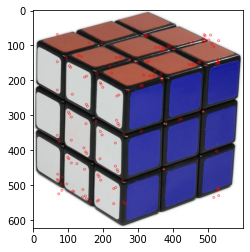

In [42]:
# Following the guide, and as recommended by the BRIEF paper, use CenSurE as the feature method
# Create the BRIEF descriptors for the keypoints

# Initiate CenSurE Detector
CenSurE = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with CenSurE
censureKp = CenSurE.detect(img,None)
# compute the descriptors with BRIEF
censureKp, briefDes = brief.compute(img, censureKp)

CenSurEImg =  cv2.drawKeypoints(img, censureKp, None, color=(255,0,0))
plt.imshow(CenSurEImg)
plt.show()

In [44]:
print(f"We have {len(censureKp)} key points each with a 32-dim vector resulting in a descriptor of shape {briefDes.shape}.")


We have 143 key points each with a 32-dim vector resulting in a descriptor of shape (143, 32).


Check out [the guide](https://docs.opencv.org/3.4.3/d1/d89/tutorial_py_orb.html) on ORB. Since ORB provides both a detector and descriptor, we can use the [detectAndCompute method](https://docs.opencv.org/3.4.3/d0/d13/classcv_1_1Feature2D.html#a8be0d1c20b08eb867184b8d74c15a677). This method simply applies both the detecting portion and computation in the same method.

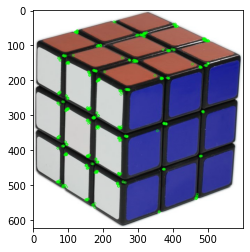

In [46]:
# Create the ORB object and save it to orb
# Determine the keypoints and descriptors using ORB and save them to orbKp, orbDes
# Draw the keypoints on the original image

# YOUR CODE HERE
#raise NotImplementedError()
orb = cv2.ORB_create() 
orbKp = orb.detect(img,None)
orbKp, orbDes = orb.compute(img, orbKp )
orbImg = cv2.drawKeypoints(img, orbKp , None, color=(0,255,0), flags=0)

plt.imshow(orbImg)
plt.show()

In [47]:
assert orb
assert orbDes.shape == (len(orbKp),32)

Now find an image off the internet that you want to detect the corners of and scroll up and update the `img` variable. Re-run the code and check out the results.

Here are some good examples:

- Blocks: https://www.learningresources.com/images/products/en_us/detail/prod0136_dt.jpg
- Rubik's Cube: https://qph.fs.quoracdn.net/main-qimg-03e4eff680fb326985c1b2aa741d977c-c
- Legos: https://i1.wp.com/www.processmodel.com/wp-content/uploads/2018/02/lego-for-model-objects-1.jpg?fit=672%2C372&ssl=1

## Feedback

In [49]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    return "It was okay"